In [1]:
import codecs
import requests
import tweepy
from textblob import TextBlob
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
import networkx
import warnings
import pandas as pd

In [2]:
# Inserting API keys
consumer_key= '' 
consumer_secret= ''
access_token=''
access_token_secret=''
# Authentication 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# Function to remove URLs from tweets
def urlRemove(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [4]:
# Set custom search 
search = "#biden+harris+administration -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search,
                   lang="en",
                   since='2021-08-20').items(1000) # change this date further back or more recent based on time interval of interest

# Remove URLs
cleaned_tweets = [urlRemove(tweet.text) for tweet in tweets]

In [6]:
# TextBlob object of pulled tweets
sentiment_raw = [TextBlob(tweet) for tweet in cleaned_tweets]

sentiment_raw[0].polarity, sentiment_raw[0]

(-0.2,
 TextBlob("Biden Harris administration supposedly killed 2 ISIS K attack planners"))

In [8]:
# Get polarity values of tweet text
sentiment = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_raw]

sentiment[0]

[-0.2,
 'Biden Harris administration supposedly killed 2 ISIS K attack planners']

In [10]:
# Put tweets and polarity in dataframe
sentiment_df = pd.DataFrame(sentiment, columns=["polarity", "tweet"])
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

sentiment_df.head()

,polarity,tweet
0,-0.200000,Biden Harris administration supposedly killed ...
2,-0.155556,no No NO Remenber The BidenHarris administrati...
6,-0.200000,Kabul ExPence Advisor Warned Trump Was Setting...
9,0.008333,12 US military personnel killed in bomb attack...
10,0.500000,If there is a hostage situation in Afghanistan...


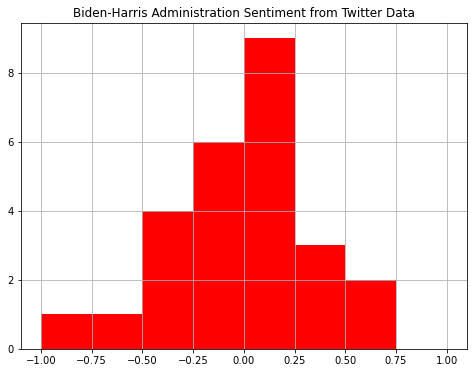

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")

plt.title("Biden-Harris Administration Sentiment from Twitter Data")
plt.show()